In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib.ticker import LogLocator

In [2]:
def set_sns_style():
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

In [37]:
binary_df = pd.read_csv("reports/numpy_binary_times.csv")
# ternary_df = pd.read_csv("multiplication_times_ternary.csv")

In [38]:
binary_df.head()

,n,standard,rsr,rsrpp
0,2048,0.022676,0.013405,0.019047
1,4096,0.146511,0.033453,0.046914
2,8192,0.922117,0.088837,0.166224
3,16384,4.902223,0.285241,0.401454
4,32768,22.480075,0.936295,1.369630


In [47]:
def plot(df, filename: str):
    set_sns_style()

    n = df['n']  
    standard = df['standard'] * 1000 # convert s to ms 
    rsr = df['rsr'] * 1000
    rsrpp = df['rsrpp'] * 1000

    plt.figure(figsize=(10, 6))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(n, standard, label='Standard (NumPy)', marker="o")
    plt.plot(n, rsr, label='RSR', marker="o")


    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(n)):
        plt.plot([n[i], n[i]], [standard[i], rsr[i]], 
                color='gray', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(n):
        plt.text(length, (standard[i] + rsr[i]) / 2, f"{standard[i]/rsr[i]:.2f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)
    plt.xlabel('$n$')
    plt.ylabel('Time (ms)')
    plt.legend()

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


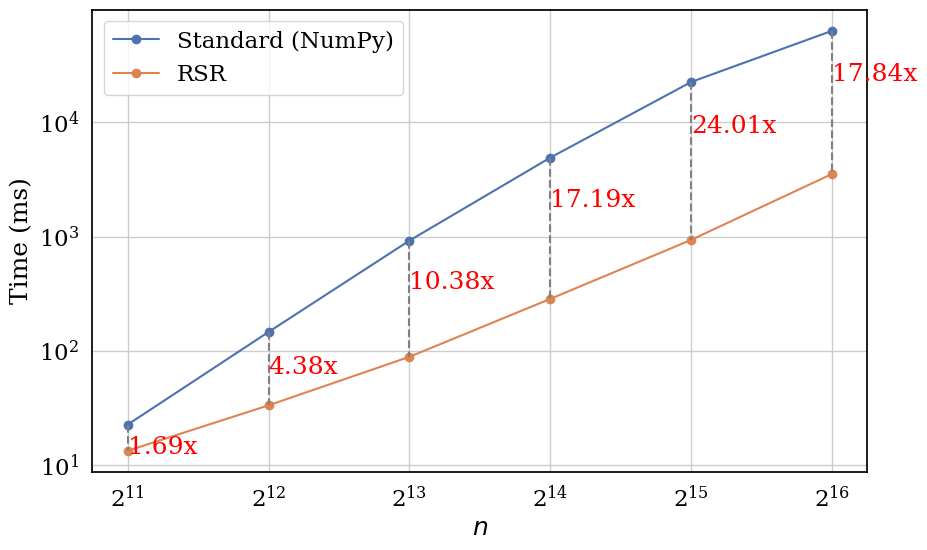

In [48]:
plot(binary_df, "figures/numpy_binary")
# plot(ternary_df, "new_ternary")

### K Comparison

In [6]:
k_comparison_df = pd.read_csv("reports/compare_k.csv")

In [7]:
k_comparison_df.head()

,n,k,rsr,rsrpp
0,2048,1,27,28
1,2048,2,14,14
2,2048,3,9,10
3,2048,4,8,7
4,2048,5,8,6


In [33]:
def plot_k_comparison(data, filename):
    set_sns_style()
    
    # Function to format legend labels in log2 format
    def format_log2_labels(n_values):
        return [f"$2^{{{int(np.log2(n))}}}$" for n in n_values]

    # Plot for RSR times
    plt.figure(figsize=(10, 6))
    rsr_plot = sns.lineplot(data=data, x='k', y='rsr', hue='n', marker='o', palette="viridis")
    plt.xlabel("$k$")
    plt.ylabel("Time (ms)")
    plt.yscale('log', base=10)

    # Format legend in log2
    handles, labels = rsr_plot.get_legend_handles_labels()
    formatted_labels = format_log2_labels(data['n'].unique())
    plt.legend(handles, formatted_labels, title="$n$", loc='best', ncol=len(handles)/2)

    # Mark optimal points for RSR
    for n_value, subset in data.groupby("n"):
        min_row = subset.loc[subset['rsr'].idxmin()]
        plt.plot(min_row['k'], min_row['rsr'], 'ro', label=f"Optimal for $n=2^{{{int(np.log2(n_value))}}}$" if n_value == data['n'].min() else "")

    plt.savefig(f"{filename}_rsr.eps", format='eps', bbox_inches='tight')

    plt.show()

    # Plot for RSRPP times
    plt.figure(figsize=(10, 6))
    rsrpp_plot = sns.lineplot(data=data, x='k', y='rsrpp', hue='n', marker='o', palette="viridis")
    plt.xlabel("$k$")
    plt.ylabel("Time (ms)")
    plt.yscale('log', base=10)

    # Format legend in log2
    handles, labels = rsrpp_plot.get_legend_handles_labels()
    plt.legend(handles, formatted_labels, title="$n$", loc='best', ncol=len(handles)/2)

    # Mark optimal points for RSRPP
    for n_value, subset in data.groupby("n"):
        min_row = subset.loc[subset['rsrpp'].idxmin()]
        plt.plot(min_row['k'], min_row['rsrpp'], 'ro', label=f"Optimal for $n=2^{{{int(np.log2(n_value))}}}$" if n_value == data['n'].min() else "")

    plt.savefig(f"{filename}_rsrpp.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


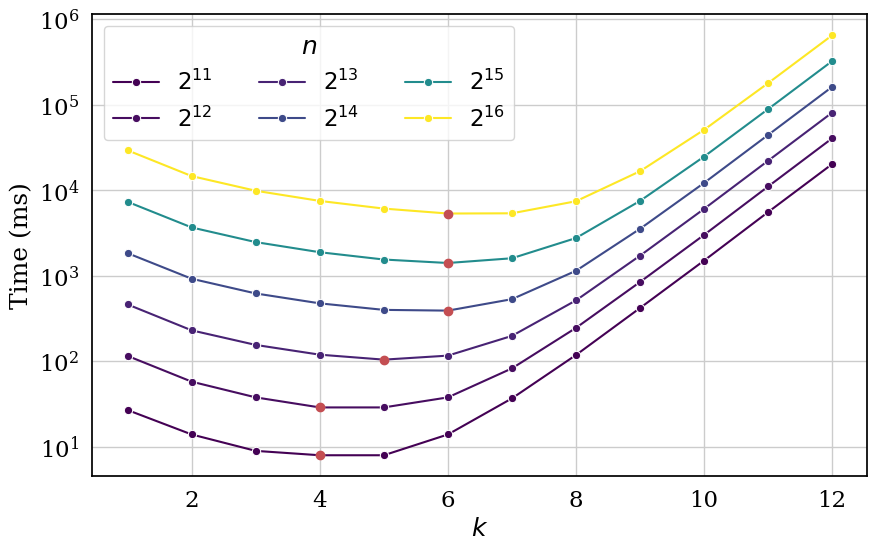

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


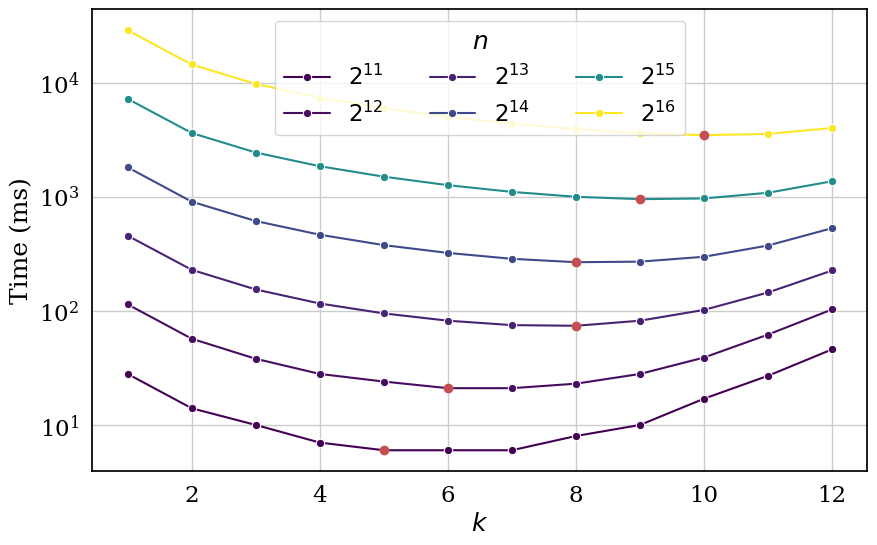

In [34]:
plot_k_comparison(k_comparison_df, "k")

## Native: Times

In [4]:
df = pd.read_csv("reports/multiplication_times_binary.csv")

In [5]:
df.head()

,Log Vector Length,Naive Time (ms),RSR Time (ms),RSRPP Time (ms)
0,11,56,8,6
1,12,244,30,24
2,13,1402,104,96
3,14,6668,391,323
4,15,32038,1409,1278


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


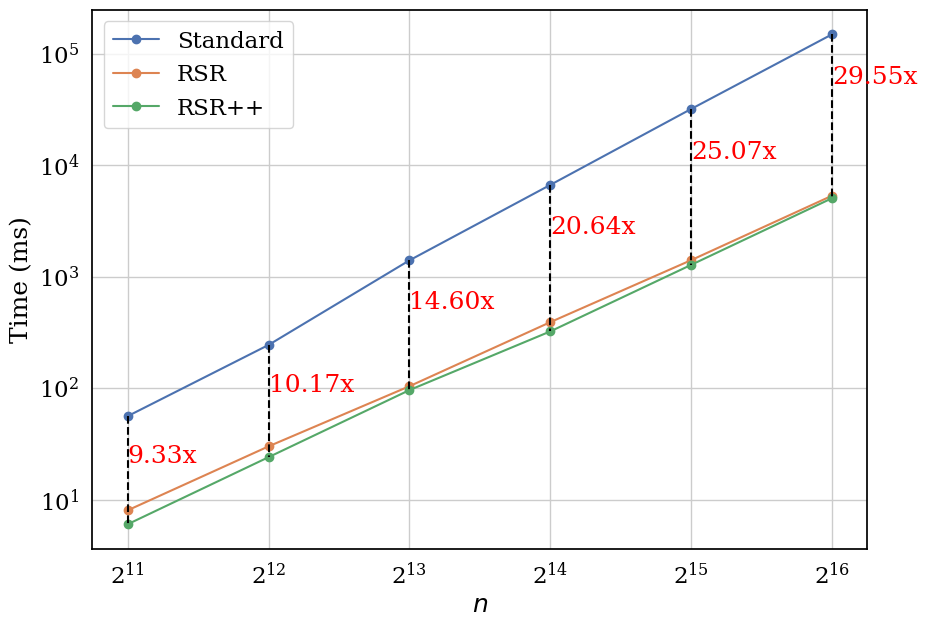

In [10]:
set_sns_style()

names = {
    "Naive Time (ms)": "Standard",
    "RSR Time (ms)": "RSR",
    "RSRPP Time (ms)": "RSR++"
}

n = np.power(2, df['Log Vector Length'])
standard = df['Naive Time (ms)']
rsr = df['RSR Time (ms)']
rsrpp = df['RSRPP Time (ms)']

plt.figure(figsize=(10, 7))


# Plot times for NaiveMultiplier and RSRMultiplier
for key in names.keys():
    plt.plot(n, df[key], label=names[key], marker="o")
    # plt.plot(n, rsr, label='RSR', marker="o")


# Draw lines connecting Naive and RSR times for each vector length to show speedup visually
for i in range(len(n)):
    plt.plot([n[i], n[i]], [standard[i], rsrpp[i]], 
            color='black', linestyle='--')

# Label the points with the speedup factor
for i, length in enumerate(n):
    plt.text(length, (standard[i] + rsrpp[i]) / 2, f"{standard[i]/rsrpp[i]:.2f}x",
            ha='left', va="top", color='red')

# Configure the plot aesthetics
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('$n$')
plt.ylabel('Time (ms)')
plt.legend()

# Configure x-axis ticks for log base 2 and a clean grid
plt.gca().xaxis.set_major_locator(LogLocator(base=2))

# Save as EPS and display
plt.savefig(f"figures/native_binary_times.eps", format='eps', bbox_inches='tight')
plt.show()

## Native: RSR vs. RSR++

/home/mohsen/venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mohsen/venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_3064873/3429349661.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"$2^{{{i}}}$" for i in log_vector_lengths])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


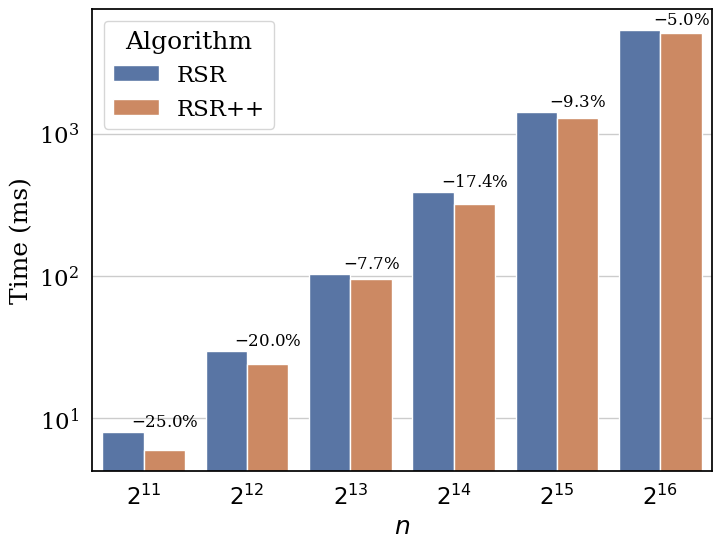

In [31]:
# Data preparation
# positions = [11, 12, 13, 14, 15, 16]
# values1 = [1, 2, 3, 4, 5, 6]
# values2 = [1.2, 2.2, 3.2, 4.2, 5.2, 6.2]

log_vector_lengths = df['Log Vector Length'].tolist()  # Length of each vector
rsr_times = (df['RSR Time (ms)']).tolist()
rsrpp_times = (df['RSRPP Time (ms)']).tolist()

improvements = [100 * (rsr_times[i] - rsrpp_times[i]) / rsr_times[i] for i in range(len(log_vector_lengths))]

data = pd.DataFrame({
    '$n$': log_vector_lengths * 2,
    'Time (ms)': rsr_times + rsrpp_times,
    'Algorithm': ['RSR'] * 6 + ['RSR++'] * 6
})

# Plotting
plt.figure(figsize=(8, 6))
plt.yscale("log", base=10)
# plt.xscale("log", base=2)
ax = sns.barplot(data=data, x='$n$', y='Time (ms)', hue='Algorithm', dodge=True)
ax.set_xticklabels([f"$2^{{{i}}}$" for i in log_vector_lengths])
# plt.title("Bar Chart with Two Sets of Bars at Each Position")

bar_width = 0.2  # approximate width for alignment adjustment
for i, (pos, rel_imp) in enumerate(zip(log_vector_lengths, improvements)):
    # Calculate positions for the label to appear centered above each pair of bars
    x_pos = i + bar_width  # centering above both bars at each position
    y_pos = 1.1 * max(rsr_times[i], rsrpp_times[i])  # slightly above the taller bar
    ax.text(x=x_pos, y=y_pos, s=f"$-${rel_imp:.1f}%", ha='center', color='black', fontsize=12)

# plt.savefig(f"figures/native_binary_times_rsr_rsrpp.eps", format='eps', bbox_inches='tight')
plt.show()